## Прямые методы решения линейных систем

1. Метод Гаусса: как вычисляются элементы матриц $L$ и $U$? Продейлайте LU разложение для системы $3 \times 3$, и получите общую формулу для элементов матриц $L$ и $U$.

2. Докажите, что для матрицы $A = A^T >0$, LU разложение сводится к разложению Холецкого $A = C C^T$

3. Выбор ведущего элемента ($t$ - длина мантиссы):
$$
A = 
\left[
\begin{array}{cc}
2^{-t} & 1. \\ 
1. & 1. 
\end{array}
\right]
$$

Time = 0.00000e+00
[0 2 2]
[[ 0.66879486  0.81922681  0.13114802]
 [ 0.69260553  0.17376471  0.44945067]
 [ 0.68639175 -0.39354058  0.90188135]]


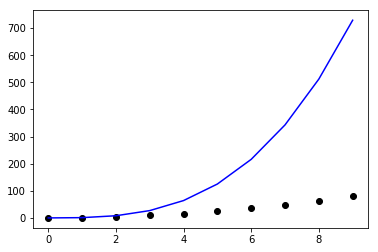

In [80]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import scipy.linalg as la
import time

n = 3
A = np.random.rand(n,n)
b = np.random.rand(n)
x_ex = np.linalg.solve(A,b)

# ?la.lu_factor
# ?scipy.linalg.lu_solve
t1 = time.time()
LU, piv = la.lu_factor(A)
t2 = time.time()
print('Time = {:<10.5e}'.format(t2-t1)) # Почему время = 0?
print(piv)
print(LU)

plt.plot(np.arange(10)**2,'ko')
plt.plot(np.arange(10)**3,'b-')



In [81]:
%%timeit
# Так можно измерить время исполнения данной ячейке
LU, piv = la.lu_factor(A)

21.8 µs ± 348 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Задачи
1. Напишите код для решения линейной системы со случайной матрицей с помощью LU разложения с применением готовых функций.
2. Постройте график зависимости времени на решение системы от размера системы (точками). На этом же графике постройте теоретическую зависимость (сплошной линией). 
3. Постройте такой же график для времени, затрачиваемого на LU разложение
4. Напишите свою программу, которая по LU разложению вычисляет решение системы. Возьмите LU разложение из готовой функции, сравните решение с решением из стандартной функции. Сравните время работы вашей функции и стандартной функции.

## QR разложение

* Можно ли обобщить QR разложение на непрерывный случай? Что получится, если применить процесс Грамма-Шмидта к многочленам, со скалярным произведением
$$
(f,g) = \int_{a}^{b} f(x) g(x) \; dx
$$
Проделайте для многочленов до 2-й степени на отрезке $[-1,1]$, начав с $1, x, x^2$


* Рассмотрим задачу интерполяции: мы хотим приблизить неизвестную функцию $f$ многочленом $p$ по значениям функции в точках $y_1 = f(x_1), \ldots, y_n = f(x_m)$ 
Обычно, мы рассматриваем многочлен, как линейную комбинацию базовых степенных функций $x^k$ с коэффициентами:
$$
p(x) = \sum_{k=0}^{n-1} c_k x^k
$$
Тогда, задача интерполяции сводится к поиску неизвестных коэффициентов $c_k$. Запишем требование $p(x_i) = y_i$, получим линейную систему с матрицей Вандермонда:
$$
\left[\begin{array}{cccc}
1 & x_1 & \ldots x_1^{n-1} \\
1 & x_2 & \ldots x_2^{n-1} \\
 & \vdots & \ldots \vdots \\
1 & x_m & \ldots x_m^{n-1} 
\end{array}\right]
\left[\begin{array}{c}
c_0 \\
\vdots \\
c_{n-1}
\end{array}\right] \approx
\left[\begin{array}{c}
y_1 \\ 
y_2 \\
\vdots \\
y_m
\end{array}\right]
$$
Если $m = n$, то эта система имеет точное решение, при $m >n$ можно применить МНК.  
Заметим, что в столбцах матрицы $A$ стоят значения базисных функций (т.е. $x^k$) в точках интерполяции. Если применить QR разложение, то столбцы матрицы $Q$ будут новыми базисными "функциями". 
    * Сделайте $QR$ разложение для матрицы Вандермонда по точкам на отрезке $[-1,1]$, и постройте графики значений в стобце от $x_i$. 
    * Постройте на том же рисунке график ортогонального многочлена 2-й степени из предыдущего задания.

* Решите задачу интерполяции для какой-либо функции на $[-1,1]$ методом наименьших квадратов (возьмите точек больше чем степень многочлена +1) с помощью qr разложения. Напишите свой цикл для решения системы с треугольной матрицей $R$. Проверьте его правильность, сравнив с решением, полученным функцией **np.linalg.solve**  
Нарисуйте график многочлена на отрезке сплошной линией, и символами - значения функции в точках интерполяции 